AdaBoost trains predictors sequentially, each one improving on the last by focussing on the instances that the predecessor underfit

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

# Drop rows with missing values for simplicity
titanic = titanic.dropna(subset=['age', 'embarked'])

# Convert categorical variables to dummy/indicator variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic['survived']

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=30,
    learning_rate=0.5,
    random_state=42
)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [5]:
# Get feature importances
importances = ada_clf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

      Feature  Importance
1         age    0.400000
5    sex_male    0.166667
0      pclass    0.133333
2       sibsp    0.133333
4        fare    0.133333
3       parch    0.033333
6  embarked_Q    0.000000
7  embarked_S    0.000000


<ipython-input-6-91c2a0426d24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


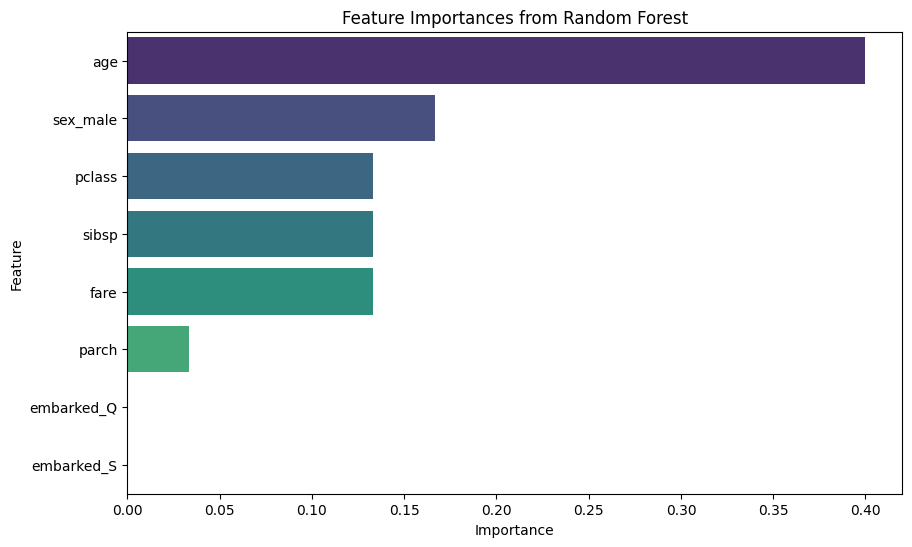

In [6]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.show()